<a href="https://colab.research.google.com/github/Yagamoo/covid_data_mining/blob/main/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from mlxtend.preprocessing import minmax_scaling
from warnings import filterwarnings

filterwarnings("ignore")

In [ ]:
df_covid = pd.read_csv("WHO-COVID-19-global-data.csv")
df_covid

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
1,2020-01-04,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
2,2020-01-05,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
3,2020-01-06,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
4,2020-01-07,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
140366,2023-05-25,IL,Israel,EURO,116.0,4825839.0,1.0,12539.0
140367,2023-05-26,IL,Israel,EURO,89.0,4825928.0,1.0,12540.0
140368,2023-05-27,IL,Israel,EURO,56.0,4825984.0,0.0,12540.0
140369,2023-05-28,IL,Israel,EURO,71.0,4826055.0,1.0,12541.0


In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140371 entries, 0 to 140370
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      140371 non-null  object 
 1   Country_code       140371 non-null  object 
 2   Country            140371 non-null  object 
 3   WHO_region         140371 non-null  object 
 4   New_cases          140370 non-null  float64
 5   Cumulative_cases   140370 non-null  float64
 6   New_deaths         140370 non-null  float64
 7   Cumulative_deaths  140370 non-null  float64
dtypes: float64(4), object(4)
memory usage: 8.6+ MB


In [ ]:
df_covid.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,1.403700e+05,1.403700e+05,140370.000000,140370.000000
mean,2.653663e+03,1.552534e+06,21.521643,18077.945266
std,5.614040e+04,6.802919e+06,160.740910,70002.374797
min,-8.261000e+03,0.000000e+00,-3520.000000,0.000000
25%,0.000000e+00,4.953000e+03,0.000000,34.000000
50%,1.000000e+00,3.837150e+04,0.000000,396.000000
75%,1.690000e+02,4.103168e+05,2.000000,7118.000000
max,6.966046e+06,9.931161e+07,11447.000000,704659.000000


In [ ]:
df_covid.describe(include="object")

,Date_reported,Country_code,Country,WHO_region
count,140371,140371,140371,140371
unique,1364,103,103,7
top,2020-01-03,AF,Afghanistan,AMRO
freq,103,1364,1364,42284


Missing Value

In [ ]:
df_covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
1,2020-01-04,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
2,2020-01-05,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
3,2020-01-06,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
4,2020-01-07,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0


In [ ]:
missing_values_count = df_covid.isnull().sum()
missing_values_count

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            1
Cumulative_cases     1
New_deaths           1
Cumulative_deaths    1
dtype: int64

In [ ]:
percent_missing = 100*df_covid.isnull().sum() / df_covid.shape[0]
total_percent_missing = df_covid.isnull().sum().sum() / np.product(df_covid.shape)

print(f"Total missing percentage: {total_percent_missing:.2%}")
print(percent_missing)

Total missing percentage: 0.00%
Date_reported        0.000000
Country_code         0.000000
Country              0.000000
WHO_region           0.000000
New_cases            0.000712
Cumulative_cases     0.000712
New_deaths           0.000712
Cumulative_deaths    0.000712
dtype: float64


In [ ]:
so_missing_value_count = df_covid.isnull().sum()
so_missing_value_count.to_dict()

{'Date_reported': 0,
 'Country_code': 0,
 'Country': 0,
 'WHO_region': 0,
 'New_cases': 1,
 'Cumulative_cases': 1,
 'New_deaths': 1,
 'Cumulative_deaths': 1}

Mengahpus missing value

In [ ]:
df_covid.dropna(subset="New_cases", inplace=True)

In [ ]:
df_covid

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
1,2020-01-04,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
2,2020-01-05,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
3,2020-01-06,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
4,2020-01-07,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
140365,2023-05-24,IL,Israel,EURO,123.0,4825723.0,1.0,12538.0
140366,2023-05-25,IL,Israel,EURO,116.0,4825839.0,1.0,12539.0
140367,2023-05-26,IL,Israel,EURO,89.0,4825928.0,1.0,12540.0
140368,2023-05-27,IL,Israel,EURO,56.0,4825984.0,0.0,12540.0


Mengisi missing value

In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140370 entries, 0 to 140369
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      140370 non-null  object 
 1   Country_code       140370 non-null  object 
 2   Country            140370 non-null  object 
 3   WHO_region         140370 non-null  object 
 4   New_cases          140370 non-null  float64
 5   Cumulative_cases   140370 non-null  float64
 6   New_deaths         140370 non-null  float64
 7   Cumulative_deaths  140370 non-null  float64
dtypes: float64(4), object(4)
memory usage: 9.6+ MB


In [ ]:
df_covid.Cumulative_cases.fillna(0, inplace=True)

In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140370 entries, 0 to 140369
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      140370 non-null  object 
 1   Country_code       140370 non-null  object 
 2   Country            140370 non-null  object 
 3   WHO_region         140370 non-null  object 
 4   New_cases          140370 non-null  float64
 5   Cumulative_cases   140370 non-null  float64
 6   New_deaths         140370 non-null  float64
 7   Cumulative_deaths  140370 non-null  float64
dtypes: float64(4), object(4)
memory usage: 9.6+ MB


In [ ]:
df_covid[["New_deaths", "Cumulative_deaths"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140370 entries, 0 to 140369
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   New_deaths         140370 non-null  float64
 1   Cumulative_deaths  140370 non-null  float64
dtypes: float64(2)
memory usage: 3.2 MB


Inkonsisten

In [ ]:
df_covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
1,2020-01-04,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
2,2020-01-05,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
3,2020-01-06,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
4,2020-01-07,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0


In [ ]:
df_covid.loc[0, "Date_reported"]

'2020-01-03'

In [ ]:
df_covid.Date_reported.info()

<class 'pandas.core.series.Series'>
Int64Index: 140370 entries, 0 to 140369
Series name: Date_reported
Non-Null Count   Dtype 
--------------   ----- 
140370 non-null  object
dtypes: object(1)
memory usage: 6.2+ MB


In [ ]:
pd.to_datetime(df_covid.Date_reported, format="%Y/%m/%d")

0        2020-01-03
1        2020-01-04
2        2020-01-05
3        2020-01-06
4        2020-01-07
            ...    
140365   2023-05-24
140366   2023-05-25
140367   2023-05-26
140368   2023-05-27
140369   2023-05-28
Name: Date_reported, Length: 140370, dtype: datetime64[ns]

In [ ]:
df_covid["rep_date"] = pd.to_datetime(df_covid.Date_reported, format="%Y/%m/%d")

In [ ]:
df_covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,dep_date,rep_date
0,2020-01-03,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0,2020-01-03,2020-01-03
1,2020-01-04,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0,2020-01-04,2020-01-04
2,2020-01-05,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0,2020-01-05,2020-01-05
3,2020-01-06,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0,2020-01-06,2020-01-06
4,2020-01-07,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0,2020-01-07,2020-01-07


Skala

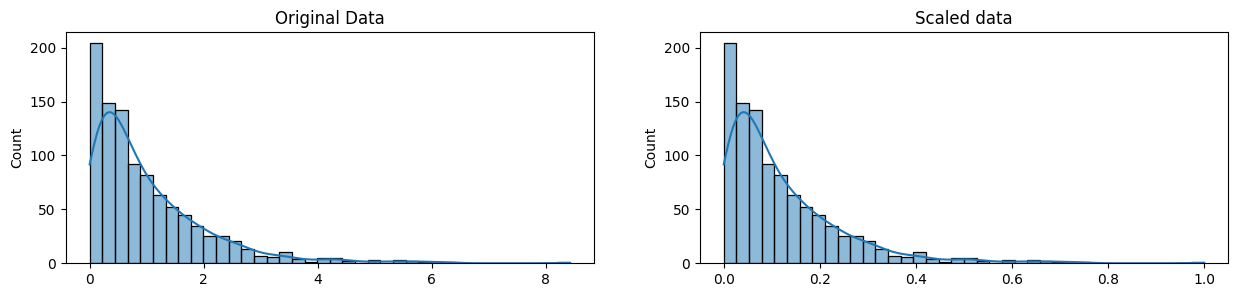

In [ ]:
# generate 1000 data points randomly drawn from an exponential distribution
rng = np.random.default_rng(1)
original_data = rng.exponential(size=1000)

# mix-max scale the data between 0 and 1
minmax_scaler = MinMaxScaler()
scaled_data = minmax_scaler.fit_transform(original_data[:, None]).flatten()
# scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data.flatten(), ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

In [ ]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit_transform(original_data[None, :]).max()

0.0

Normal

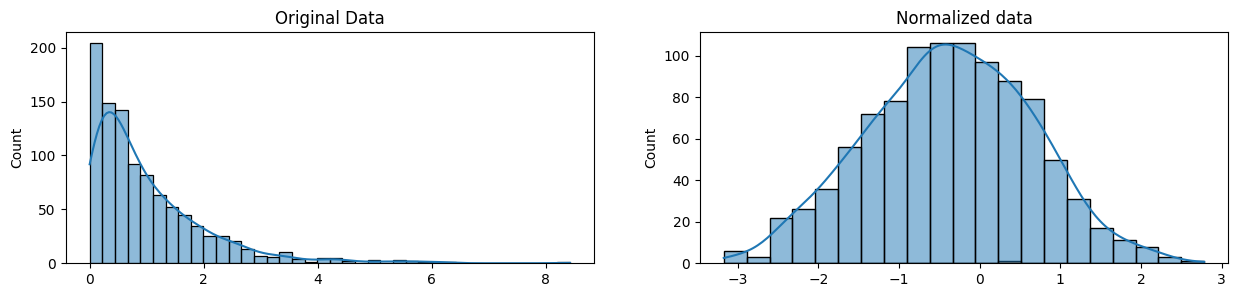

In [ ]:
# normalize the exponential data with boxcox
normal_scaler = StandardScaler()
normalized_data = stats.boxcox(original_data)
# normalized_data = normal_scaler.fit_transform(original_data[:, None]).flatten()

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

In [ ]:
normalized_data.mean(), normalized_data.std()

AttributeError: ignored